# Problem Statement
Explore and analyze the top Spotify songs
dataset to gain insights into the factors that contribute to a song's popularity, its characteristics,
and its performance on Spotify

# Research Questions
1. What is the bpm range that consist of the most songs? - Mode
2. What is the range that consist of the most songs? - Mode
3. How does a song's dancibility contributes to its popularity? - Correlation

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns

# Read File

In [116]:
df = pd.read_csv("spotify_copy.csv", encoding= 'unicode_escape')

## Step 1: Data Understanding
- Dataframe shape
- head and tail
- dtypes
- describe


In [117]:
# 953 Rows, 24 Columns
df.shape

(945, 24)

In [118]:
df.head()

,ï»¿track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023.0,7.0,14.0,553.0,147.0,141381703.0,43.0,...,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
1,LALA,Myke Towers,1.0,2023.0,3.0,23.0,1474.0,48.0,133716286.0,48.0,...,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
2,vampire,Olivia Rodrigo,1.0,2023.0,6.0,30.0,1397.0,113.0,140003974.0,94.0,...,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
3,Cruel Summer,Taylor Swift,1.0,2019.0,8.0,23.0,7858.0,100.0,800840817.0,116.0,...,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
4,WHERE SHE GOES,Bad Bunny,1.0,2023.0,5.0,18.0,3133.0,50.0,303236322.0,84.0,...,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0


In [119]:
df.columns

Index(['ï»¿track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [120]:
df.dtypes

ï»¿track_name            object
artist(s)_name           object
artist_count            float64
released_year           float64
released_month          float64
released_day            float64
in_spotify_playlists    float64
in_spotify_charts       float64
streams                 float64
in_apple_playlists      float64
in_apple_charts         float64
in_deezer_playlists      object
in_deezer_charts        float64
in_shazam_charts         object
bpm                     float64
key                      object
mode                     object
danceability_%          float64
valence_%               float64
energy_%                float64
acousticness_%          float64
instrumentalness_%      float64
liveness_%              float64
speechiness_%           float64
dtype: object

In [121]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,944.000000,943.000000,943.000000,943.000000,943.000000,943.000000,9.430000e+02,943.000000,943.000000,943.000000,943.000000,943.000000,943.00000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,1.566737,2018.319194,6.032874,13.940615,5213.310710,12.134677,5.149990e+08,67.650053,52.055143,2.653234,122.348887,66.950159,51.42948,64.348887,27.006363,1.562036,18.172853,10.143160
std,0.919793,10.882646,3.572123,9.208869,7930.899106,19.641476,5.692975e+08,86.537613,50.742566,6.018161,28.079433,14.652980,23.50541,16.560646,25.943143,8.423637,13.722408,9.910731
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,65.000000,23.000000,4.00000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.000000,0.000000,1.400955e+08,13.000000,7.000000,0.000000,99.000000,57.000000,32.50000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,4.000000,2.872789e+08,34.000000,38.000000,0.000000,120.000000,69.000000,51.00000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5516.500000,16.000000,6.739369e+08,86.500000,87.000000,2.000000,140.000000,78.000000,70.00000,77.000000,43.000000,0.000000,23.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.00000,97.000000,97.000000,91.000000,97.000000,64.000000


In [122]:
df['streams']

0      141381703.0
1      133716286.0
2      140003974.0
3      800840817.0
4      303236322.0
          ...     
940     73513683.0
941    133895612.0
942     96007391.0
943            NaN
944            NaN
Name: streams, Length: 945, dtype: float64

In [123]:
df['streams'].dtype

dtype('float64')

# Null Hypothesis (H0)
There is no indicating factor that may predict the success a song may have on the Spotify App

# Experimental Hypothesis (H1)
Having a certain percentage within one or more groups could make a song popular on the Spotify App.

In [124]:
pd.to_numeric(df['streams'], downcast="integer")

0      141381703.0
1      133716286.0
2      140003974.0
3      800840817.0
4      303236322.0
          ...     
940     73513683.0
941    133895612.0
942     96007391.0
943            NaN
944            NaN
Name: streams, Length: 945, dtype: float64

In [125]:
zero_not_accepted = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',  
           'in_deezer_charts', 'streams', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']

for column in zero_not_accepted:
    df[column] = df[column].replace(r'^\s*$', np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

In [126]:
print(df)

                           ï»¿track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook           2.0   
1                                   LALA         Myke Towers           1.0   
2                                vampire      Olivia Rodrigo           1.0   
3                           Cruel Summer        Taylor Swift           1.0   
4                         WHERE SHE GOES           Bad Bunny           1.0   
..                                   ...                 ...           ...   
940                 A Veces (feat. Feid)  Feid, Paulo Londra           2.0   
941                        En La De Ella  Feid, Sech, Jhayco           3.0   
942                                Alone           Burna Boy           1.0   
943                                  NaN                 NaN           NaN   
944                                  NaN                 NaN           8.0   

     released_year  released_month  released_day  in_spotify_pl

In [127]:
df_playlists = df.head(100)

In [128]:
df['energy_%'].describe()

count    945.000000
mean      64.348148
std       16.543102
min        9.000000
25%       53.000000
50%       66.000000
75%       77.000000
max       97.000000
Name: energy_%, dtype: float64

# How do the Top 4 Most Streamed KPop Groups on Spotify compare to top American artists?

Article for top Kpop artists: https://www.allkpop.com/article/2023/06/the-top-10-most-streamed-k-pop-artists-on-spotify

In [129]:
top_artists = ['BTS', 'SUGA', 'BLACKPINK', 'TWICE', 'Stray Kids', 'Seventeen', 'TXT', 'EXO', 'Red Velvet']
contained_in_excel = []

for i in df['artist(s)_name']:
    for j in top_artists:
        if j in str(i) and j not in contained_in_excel:
            contained_in_excel.append(j)

contained_in_excel

['BTS', 'Stray Kids', 'BLACKPINK', 'TWICE']

The list of most popular songs in 2023 by the top Kpop groups

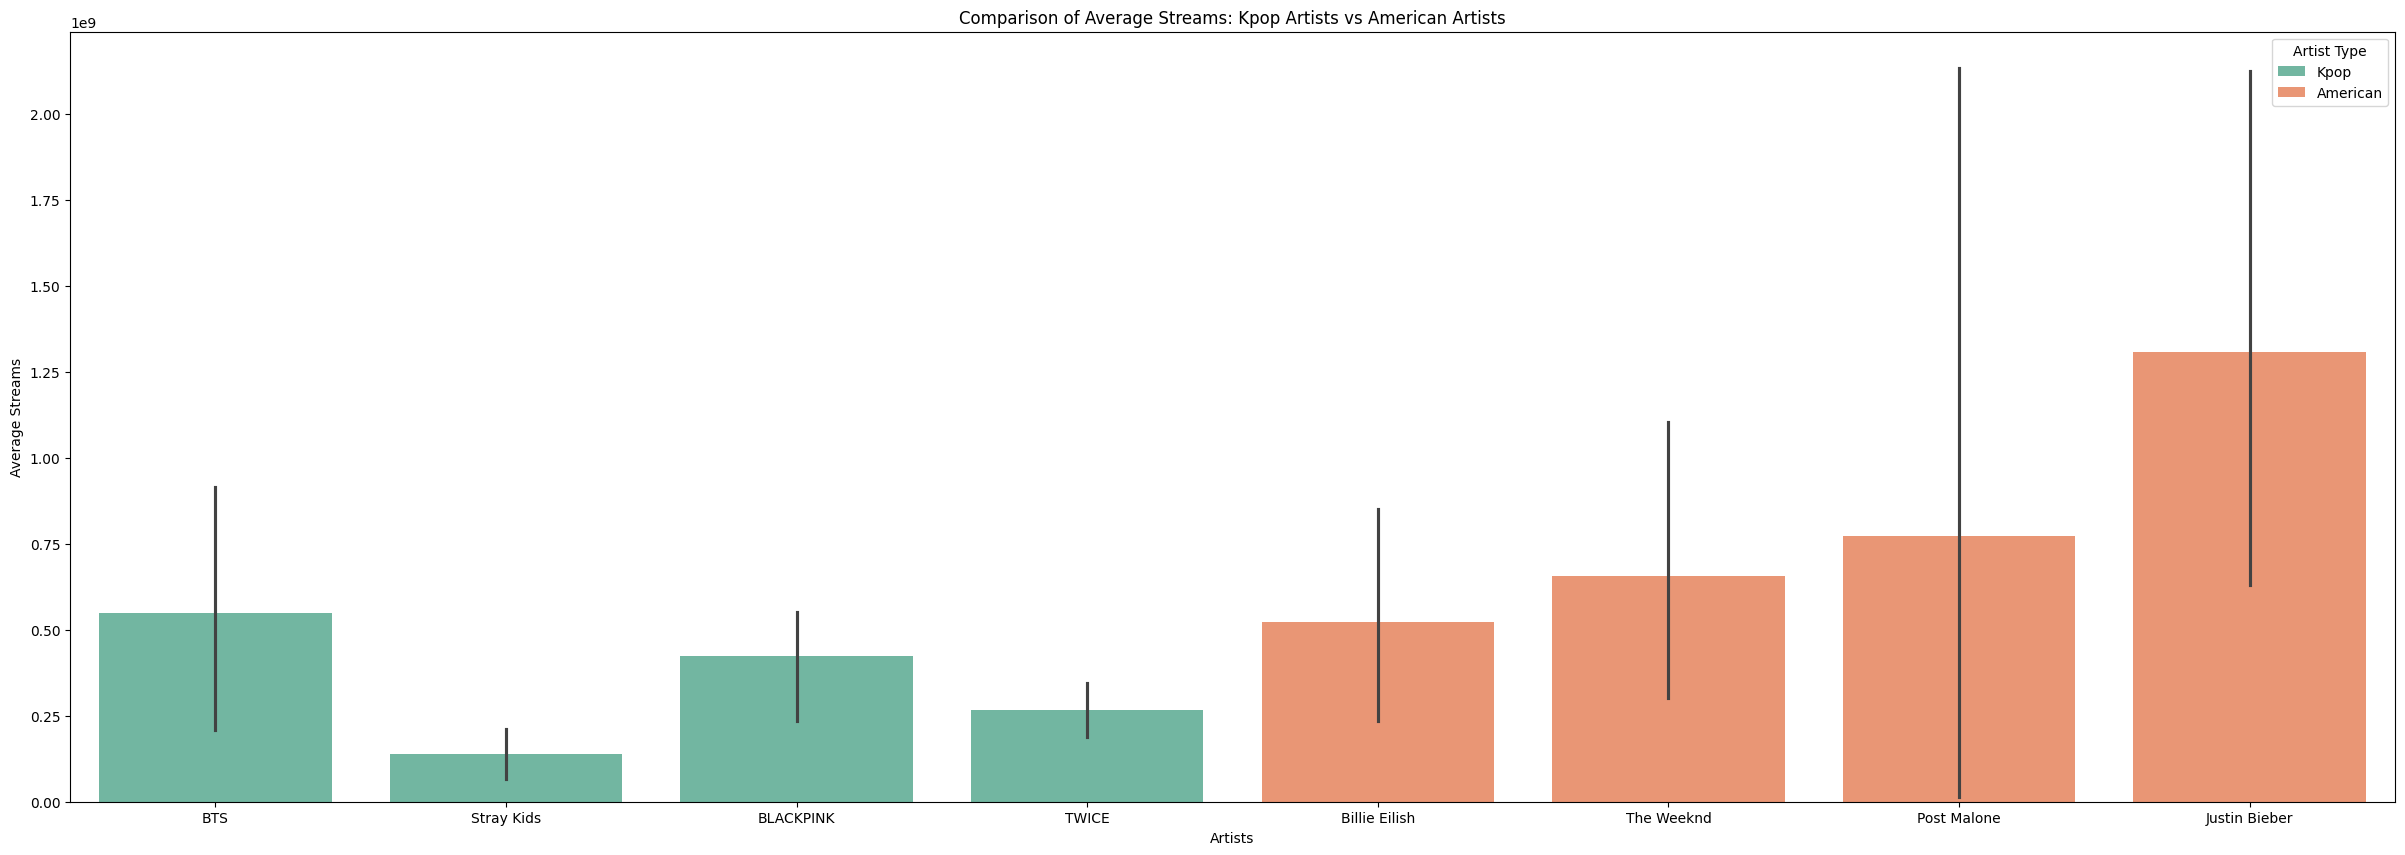

In [130]:
#Define four Kpop artists for comparison
kpop_artists = ['BTS', 'Stray Kids', 'BLACKPINK', 'TWICE']
american_artists = ['Justin Bieber', 'Post Malone', 'Billie Eilish', 'The Weeknd']

# Extract relevant columns
grouped_data = df[['artist(s)_name', 'streams']]

# Filter data for Kpop groups
kpop_data = df[df['artist(s)_name'].isin(kpop_artists)]

# Filter data for non-Kpop groups
american_data = df[df['artist(s)_name'].isin(american_artists)]

# Calculate average streams
avg_streams_kpop = kpop_data.groupby('artist(s)_name')['streams'].mean()
avg_streams_american = american_data.groupby('artist(s)_name')['streams'].mean()

# Combine both average streams dataframes
combined_data = pd.concat([kpop_data, american_data]) 

#Plot data
plt.figure(figsize=(30, 10))
sns.barplot(data=combined_data, x='artist(s)_name', y='streams', hue=combined_data['artist(s)_name'].apply(lambda x: 'Kpop' if x in kpop_artists else 'American'), palette='Set2')
plt.xlabel('Artists')
plt.ylabel('Average Streams')
plt.title('Comparison of Average Streams: Kpop Artists vs American Artists')
plt.legend(title='Artist Type')
plt.show()

One average, it shows that American artists outperform Kpop artists

# Showing the correlation of danceability and appearances in playlists

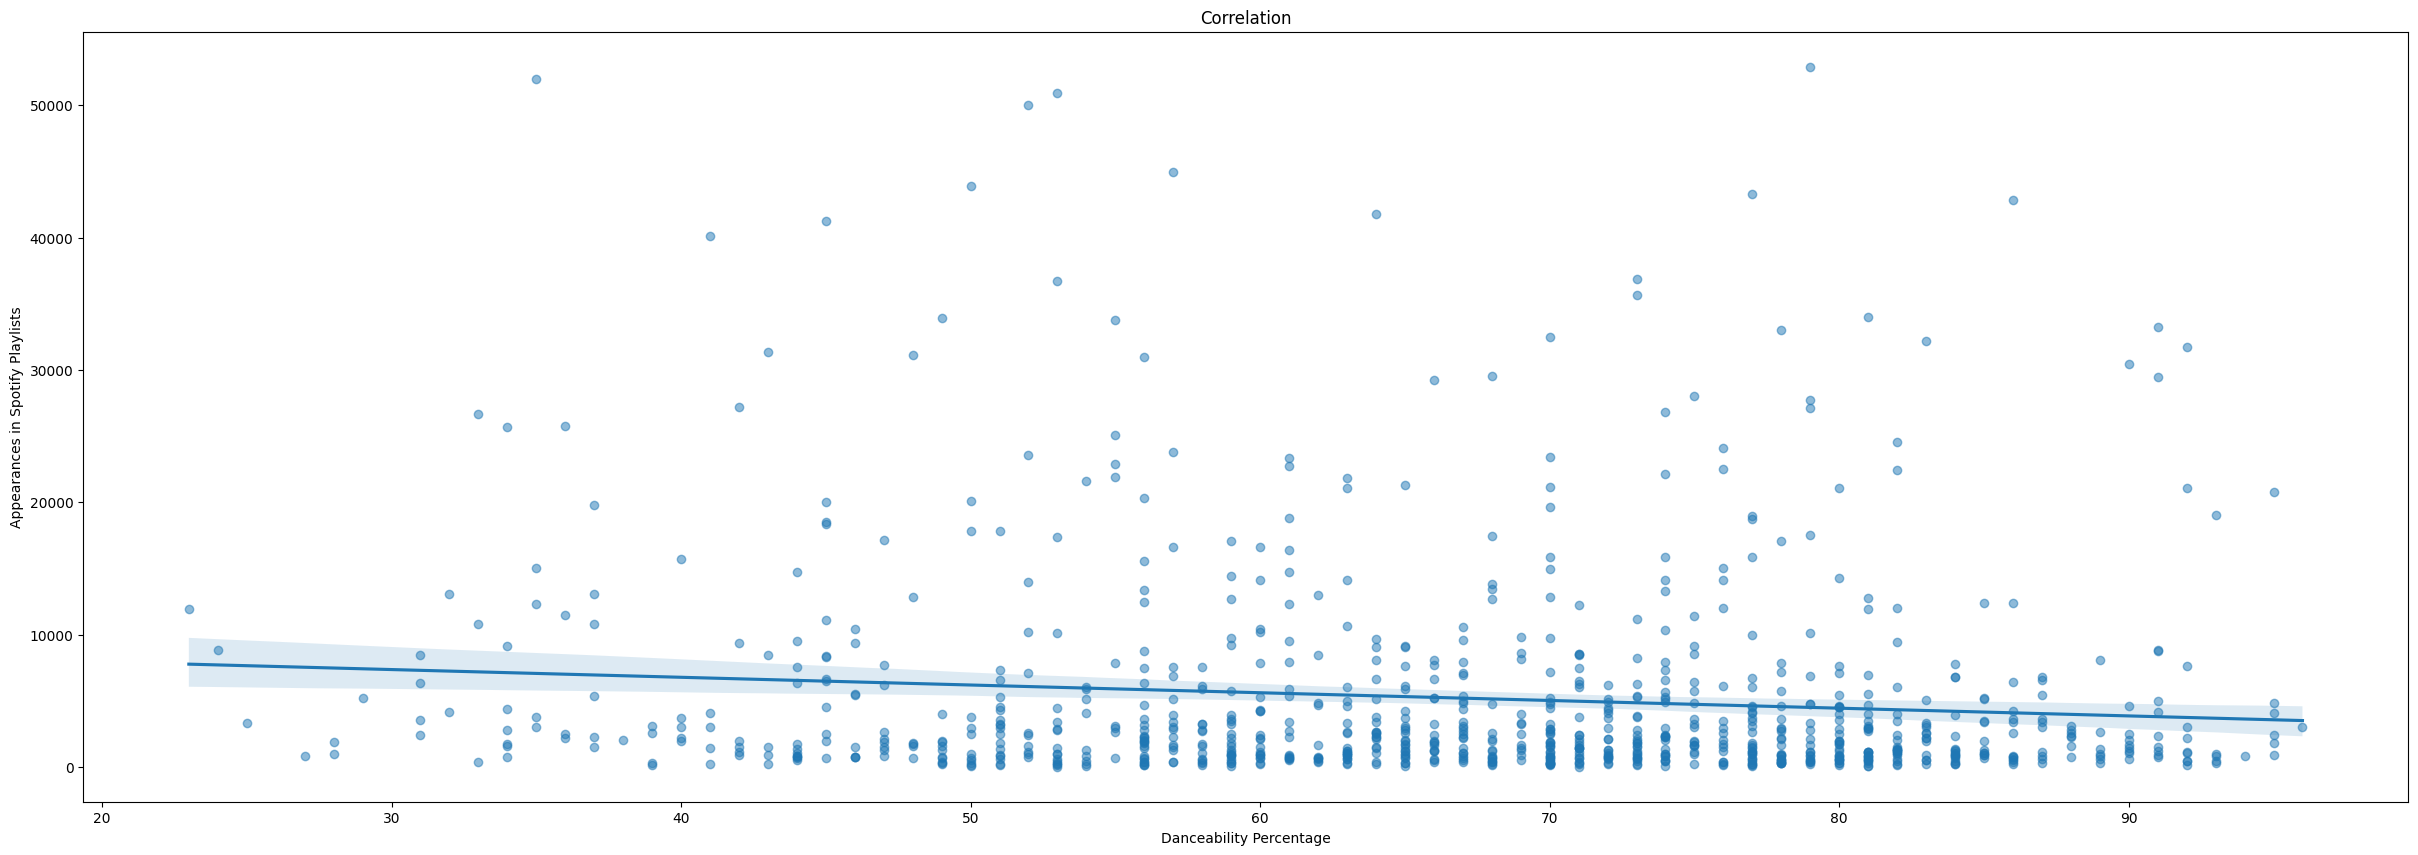

In [174]:
#Plot Data
plt.figure(figsize=(30, 10))
sns.regplot(data=df, x='danceability_%', y='in_spotify_playlists', scatter_kws={'alpha':0.5})
plt.xlabel('Danceability Percentage')
plt.ylabel('Appearances in Spotify Playlists')
plt.title('Correlation')
plt.show()

# Showing the correlation of danceability and streams

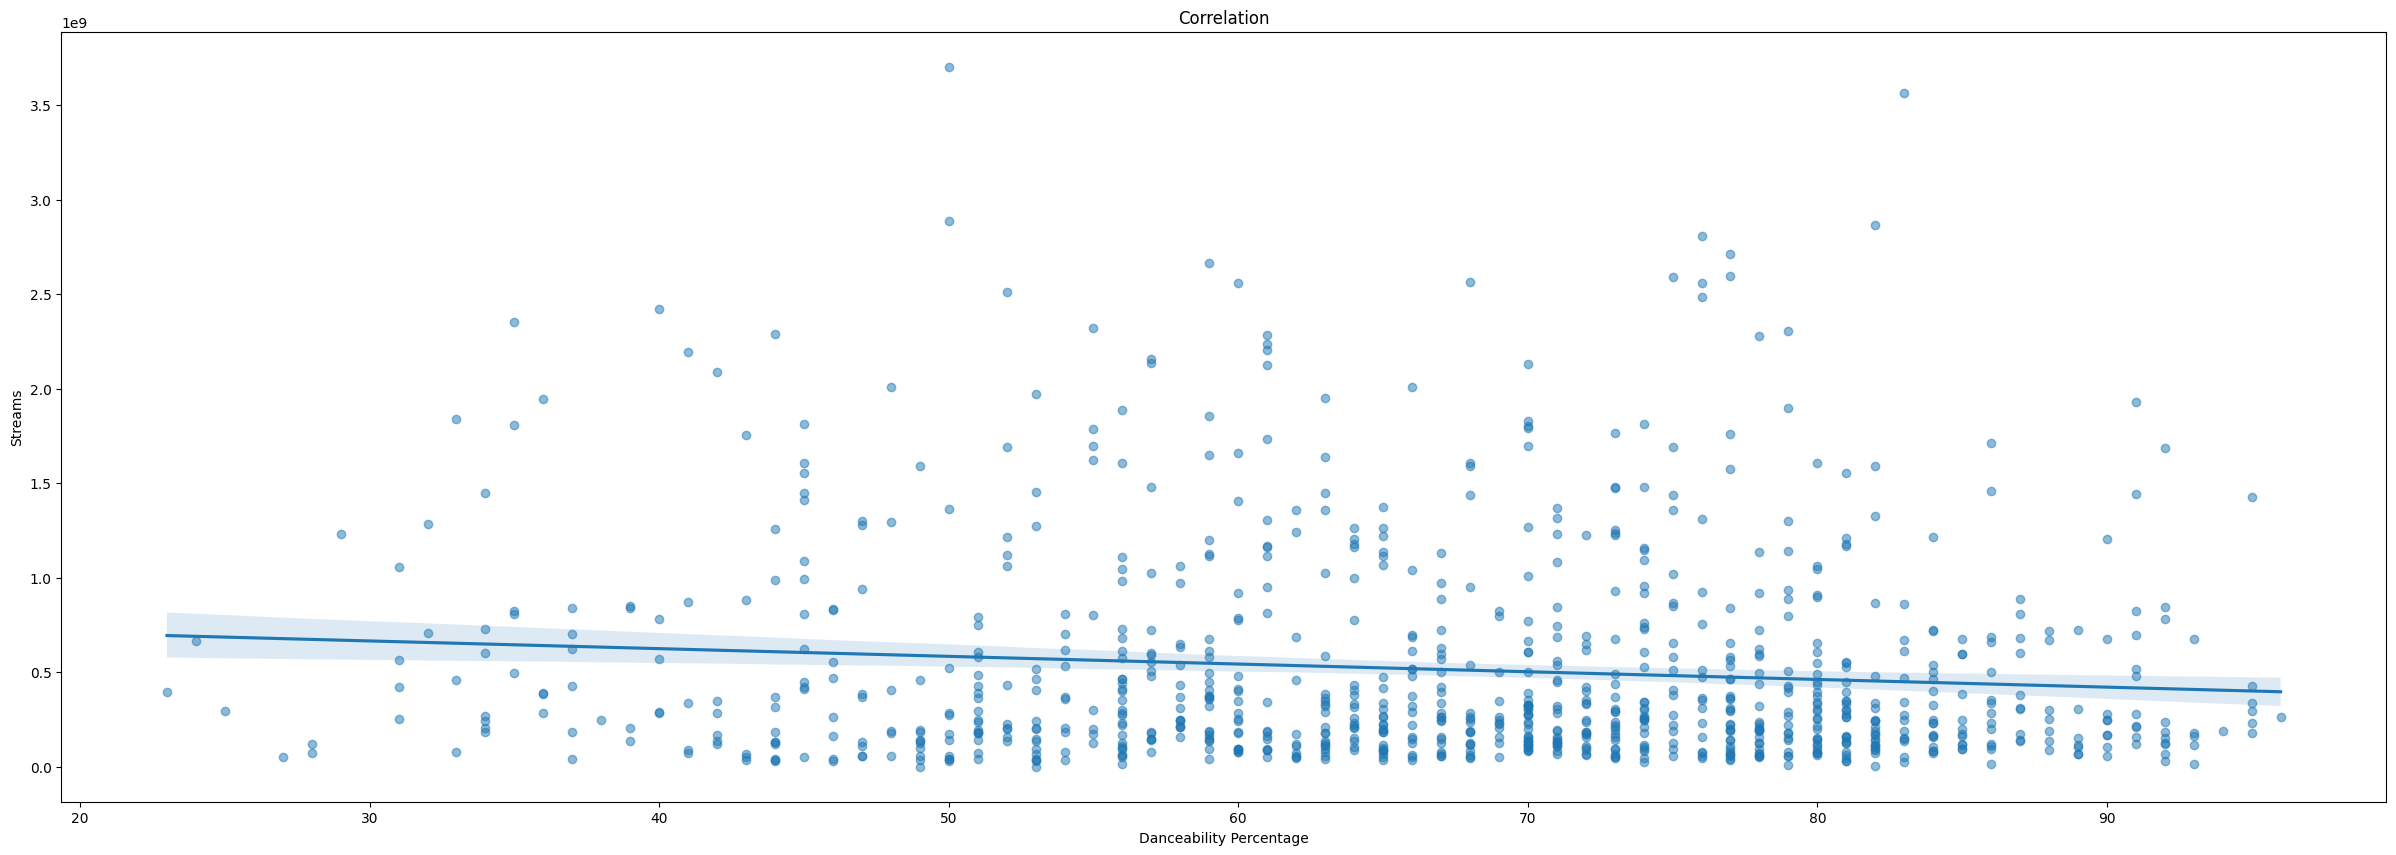

In [175]:
df_test = df.head(100)

#Plot Data
plt.figure(figsize=(30, 10))
sns.regplot(data=df, x='danceability_%', y='streams', scatter_kws={'alpha':0.5})
plt.xlabel('Danceability Percentage')
plt.ylabel('Streams')
plt.title('Correlation')
plt.show()

# ANOVA Test for Charts

In [133]:
from scipy.stats import f_oneway

f_oneway(df['in_spotify_charts'], df['in_apple_charts'], df['in_deezer_charts'])

F_onewayResult(statistic=651.640265450758, pvalue=1.5595293249298447e-233)

# ANOVA Test for %

In [134]:
f_oneway(df['in_spotify_charts'], df['danceability_%'], df['valence_%'], df['energy_%'], df['acousticness_%'])

F_onewayResult(statistic=1295.9434894962405, pvalue=0.0)

In [165]:
f_oneway(df['streams'], df['danceability_%'], df['valence_%'], df['energy_%'], df['acousticness_%'])

F_onewayResult(statistic=774.9738067663126, pvalue=0.0)

# Cluster Analysis

In [135]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [156]:
test = df.iloc[:, [4, 14, 17, 18, 19, 20]].head(100)
test

,released_month,bpm,danceability_%,valence_%,energy_%,acousticness_%
0,7.0,125.0,80.0,89.0,83.0,31.0
1,3.0,92.0,71.0,61.0,74.0,7.0
2,6.0,138.0,51.0,32.0,53.0,17.0
3,8.0,170.0,55.0,58.0,72.0,11.0
4,5.0,144.0,65.0,23.0,80.0,14.0
...,...,...,...,...,...,...
95,5.0,143.0,83.0,69.0,44.0,15.0
96,3.0,100.0,49.0,17.0,35.0,71.0
97,12.0,143.0,56.0,39.0,55.0,14.0
98,1.0,112.0,56.0,24.0,66.0,7.0


In [157]:
# split dataset: train and test
X = df.iloc[:, [4, 14, 17, 18, 19, 20]].head(100)
y = df.iloc[:, 4].head(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [158]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [159]:
import math
math.sqrt(len(y_train))

8.94427190999916

In [160]:
#Define the model
classifier = KNeighborsClassifier(n_neighbors=7, p=12, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, p=12)

In [161]:
#Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([ 5.,  7.,  7.,  7.,  1., 11.,  3.,  7.,  7.,  6.,  5.,  4.,  7.,
        7.,  6.,  7.,  1.,  3.,  7.,  6.])

In [162]:
# Evaulate model
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 2 1 0 0 0]
 [0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 2 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]]


In [163]:
print(f1_score(y_test, y_pred, average='weighted'))

0.19318181818181818


In [164]:
print(accuracy_score(y_test, y_pred))

0.2


# Now, looking at a CSV file with the columns ordered by the # of streams

In [145]:
df_sorted = pd.read_csv("spotify_sorted.csv", encoding= 'unicode_escape')

In [146]:
df_sorted.head()

,ï»¿ordered_listing,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,1.0,Blinding Lights,The Weeknd,1.0,2019.0,11.0,29.0,43899.0,69.0,3.703895e+09,...,171.0,C#,Major,50.0,38.0,80.0,0.0,0.0,9.0,7.0
1,2.0,Shape of You,Ed Sheeran,1.0,2017.0,1.0,6.0,32181.0,10.0,3.562544e+09,...,96.0,C#,Minor,83.0,93.0,65.0,58.0,0.0,9.0,8.0
2,3.0,Someone You Loved,Lewis Capaldi,1.0,2018.0,11.0,8.0,17836.0,53.0,2.887242e+09,...,110.0,C#,Major,50.0,45.0,41.0,75.0,0.0,11.0,3.0
3,4.0,Dance Monkey,Tones and I,1.0,2019.0,5.0,10.0,24529.0,0.0,2.864792e+09,...,98.0,F#,Minor,82.0,54.0,59.0,69.0,0.0,18.0,10.0
4,5.0,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.0,2018.0,10.0,9.0,24094.0,78.0,2.808097e+09,...,90.0,D,Major,76.0,91.0,50.0,54.0,0.0,7.0,5.0


In [147]:
test = df_sorted.iloc[:, [0, 15, 18, 19, 20, 21, 23, 24]].head(50)
test

,ï»¿ordered_listing,bpm,danceability_%,valence_%,energy_%,acousticness_%,liveness_%,speechiness_%
0,1.0,171.0,50.0,38.0,80.0,0.0,9.0,7.0
1,2.0,96.0,83.0,93.0,65.0,58.0,9.0,8.0
2,3.0,110.0,50.0,45.0,41.0,75.0,11.0,3.0
3,4.0,98.0,82.0,54.0,59.0,69.0,18.0,10.0
4,5.0,90.0,76.0,91.0,50.0,54.0,7.0,5.0
5,6.0,104.0,77.0,36.0,63.0,1.0,36.0,5.0
6,7.0,170.0,59.0,48.0,76.0,4.0,10.0,5.0
7,8.0,125.0,77.0,74.0,78.0,4.0,23.0,11.0
8,9.0,95.0,75.0,64.0,52.0,41.0,11.0,3.0
9,10.0,186.0,68.0,49.0,59.0,16.0,13.0,28.0


In [148]:
# split dataset: train and test
X = df_sorted.iloc[:, [0, 15, 18, 19, 20, 21, 23, 24]].head(50)
y = df_sorted.iloc[:, 0].head(50)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [149]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [150]:
import math
math.sqrt(len(y_train))

6.324555320336759

In [151]:
#Define the model
classifier = KNeighborsClassifier(n_neighbors=7, p=50, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, p=50)

In [152]:
#Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([15.,  2.,  9., 15.,  4.,  4., 13., 18., 14.,  2.])

In [153]:
# Evaulate model
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [154]:
print(f1_score(y_test, y_pred, average='weighted'))

0.0


In [155]:
print(accuracy_score(y_test, y_pred))

0.0
